In [ ]:
import os
import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from torchsummary import summary
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)

img = cv2.imread("./dog.pmp")
print("img type= ",type(img)) #<class 'numpy.ndaarray'
print("img shape=", img.shape) #480*540*3
print("img dtype=", img.dtype) #uint8
cv2.imshow("dog", img)
cv2.waitKey()
cv2.destroyAllWindows()
# vc2.waitKey(0)


In [ ]:
!pip install torchsummary 


In [ ]:


import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from torchsummary import summary 

import cv2
import numpy as np 
import matplotlib.pyplot as plt




## Image classification

### Googlenet

In [5]:
## Pretrained model list
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [7]:
# Step 1: Initialize model with the best available weights
# GoogLeNet (Inception v1) model architecture from Going Deeper with Convolutions.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights=weights)
googlenet.to(device)

googlenet.eval()
print("model smmary =")
summary(googlenet, (3, 224, 224), device=str(device))

model eval = 
model smmary =
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      Basi

In [23]:
# Step 2: Read image
## read torchvision io
## rgb format, <class 'torch.Tensor'>, torch.Size([3, 1213, 1546]) 
# filename = "./fig/classification/dog.jpg"
filename = "./fig/classification/beagle.jpg"

img = read_image(filename) # rgb format
img = img.to(device)
print(type(img)) # <class 'torch.Tensor'>
print(img.shape) # torch.Size([3, 1213, 1546]) 

<class 'torch.Tensor'>
torch.Size([3, 366, 640])


In [24]:
# Step 3: Initialize the inference transforms
# preprocess
# ImageClassification(
#     crop_size=[224]
#     resize_size=[256]
#     mean=[0.485, 0.456, 0.406]
#     std=[0.229, 0.224, 0.225]
#     interpolation=InterpolationMode.BILINEAR
# )

preprocess = weights.transforms()
print(preprocess)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.3611333].


torch.Size([1, 3, 224, 224])


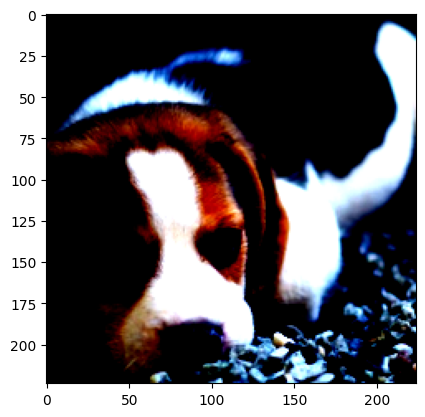

In [36]:
batch = preprocess(img).unsqueeze(0)
print(batch.shape)

##
processed_img = batch.data[0, :, :, :]
plt_img = processed_img.permute(1, 2, 0)

# plt_img.shape
plt.imshow(plt_img.cpu().numpy())
plt.show()

In [50]:
# Step 5: Use the model and print the predicted category
prediction = googlenet(batch).softmax(1)
# prediction.shape
# googlenet(batch)
# prediction[0]
class_id = prediction.argmax().item()
score = prediction[0, class_id].item()
print("score = {:.3f}%".format(score*100))

score = 89.275%


In [29]:
## categories
weights.meta["categories"]
# len(weights.meta["categories"])

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [53]:
category_name = weights.meta["categories"][class_id]
score_text = f"{category_name}: {100 * score:.1f}%"
# print(score_text)

src = cv2.imread(filename)
cv2.putText(src, score_text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1,
            (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
## Continuous display images in folder

fpath = "./fig/classification"
img_list = os.listdir(fpath)

img_files = []
for i in img_list:
    img_dir = "./fig/classification/" + i
    img_files.append(img_dir)

## googlenet load
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights=weights)
googlenet.to(device)
googlenet.eval()

preprocess = weights.transforms()

idx = 0
while True:
    img = read_image(img_files[idx]) # rgb format
    img = img.to(device)
    batch = preprocess(img).unsqueeze(0)

    prediction = googlenet(batch).softmax(1)
    class_id = prediction.argmax().item()
    score = prediction[0, class_id].item()
    # print("score = {:.3f}%".format(score*100))
    category_name = weights.meta["categories"][class_id]
    score_text = f"{category_name}: {100 * score:.1f}%"
    # print(score_text)

    src = cv2.imread(img_files[idx])
    cv2.putText(src, score_text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1,
                (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow("src", src)
    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

## Object detection
 

### Faster R-CNN
- https://github.com/csm-kr/torchvision_fasterrcnn_tutorial/blob/master/demo.py

In [13]:
import cv2
import torchvision
import numpy as np
from PIL import Image
from torchvision import transforms, models

print(cv2.__version__)

4.10.0


In [3]:
def visualize_detection_result(img_pil, boxes, labels, scores):
    """
    img_pil : pil image range - [0 255], uint8
    boxes : torch.Tensor, [num_obj, 4], torch.float32
    labels : torch.Tensor, [num_obj] torch.int64
    scores : torch.Tensor, [num_obj] torch.float32
    """

    # 1. uint8 -> float32
    image_np = np.array(img_pil).astype(np.float32) / 255.
    x_img = image_np
    im_show = cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR)

    for j in range(len(boxes)):

        label_list = list(coco_labels_map.keys())
        color_array = coco_colors_array

        x_min = int(boxes[j][0])
        y_min = int(boxes[j][1])
        x_max = int(boxes[j][2])
        y_max = int(boxes[j][3])

        cv2.rectangle(im_show,
                      pt1=(x_min, y_min),
                      pt2=(x_max, y_max),
                      color=color_array[labels[j]],
                      thickness=2)

        # text_size
        text_size = cv2.getTextSize(text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                                    fontFace=cv2.FONT_HERSHEY_PLAIN,
                                    fontScale=1,
                                    thickness=1)[0]

        # text_rec
        cv2.rectangle(im_show,
                      pt1=(x_min, y_min),
                      pt2=(x_min + text_size[0] + 3, y_min + text_size[1] + 4),
                      color=color_array[labels[j]],
                      thickness=-1)

        # put text
        cv2.putText(im_show,
                    text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                    org=(x_min + 10, y_min + 10),  # must be int
                    fontFace=0,
                    fontScale=0.4,
                    color=(0, 0, 0))

    # cv2.imshow(...) : float values in the range [0, 1]
    cv2.imshow('result', im_show)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # cv2.imwrite(...) : int values in the range [0, 255]
    # im_show = im_show * 255
    # cv2.imwrite("result.png", im_show)
    return 0


In [23]:
def demo(img_path, threshold):
    """
    demo faster rcnn
    :param img_path: image path (default - soccer.png)
    :param threshold: the threshold of object detection score (default - 0.9)
    :return: None
    """

    # 1. load image
    img_pil = Image.open(img_path) # rgb class
    transform = transforms.Compose([transforms.ToTensor()])
    img = transform(img_pil) # torch.Size([3, 576, 768])
    # batch_img = [img]
    batch_img = img.unsqueeze(0)

    weights= models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    model = models.detection.fasterrcnn_resnet50_fpn(weights=weights)
    model.eval()
    pred = model(batch_img)

    # 2. remove first batch
    pred_dict = pred[0]
    '''
    pred_dict 
    {'boxes' : tensor,
     'labels' : tensor,
     'scores' : tensor}
    '''

    # 3. get pred boxes and labels, scores
    pred_boxes = pred_dict['boxes']    # [N, 1]
    pred_labels = pred_dict['labels']  # [N]
    pred_scores = pred_dict['scores']  # [N]

    # 4. Get pred according to threshold
    indices = pred_scores >= threshold
    pred_boxes = pred_boxes[indices]
    pred_labels = pred_labels[indices]
    pred_scores = pred_scores[indices]

    # 5. visualize
    visualize_detection_result(img_pil, pred_boxes, pred_labels, pred_scores)


# if __name__ == '__main__':

coco_labels_list = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
coco_labels_map = {k: v for v, k in enumerate(coco_labels_list)}
np.random.seed(1)
coco_colors_array = np.random.randint(256, size=(91, 3)) / 255

In [24]:
demo("./fig/object_detection/dog.jpg", threshold=0.9)